<hr/>

# Introduction to Data Science
**Tamás Budavári** - budavari@jhu.edu <br/>

- Bayesian inference recap
- Sampling from posterior
- Marginal likelihood
- Model comparison

<hr/>

<h1><font color="darkblue">Bayesian Inference</font></h1>

Rev. Thomas Bayes (c.1701-1761)

<img src=https://upload.wikimedia.org/wikipedia/commons/d/d4/Thomas_Bayes.gif align=left height=200>


### Probabilitistic Models
- From data $D$ we infer the parameters $\theta$ of model $M$ 

>$\displaystyle p(\theta \lvert D,M) = \frac{p(\theta \lvert M)\ p(D \lvert \theta,M)}{p(D \lvert M)}$ 
><br><br>
> or
><br><br>
>$\displaystyle p(\theta) = \frac{\pi(\theta)\,{\cal{}L}(\theta)}{\int \pi(\theta)\,{\cal{}L}(\theta)\ d\theta }$

- Recall posterior, prior, likelihood, normalization

### Exercise: your 1st classification problem 

> Among some observed objects 1% belongs to a special type, e.g., quasars mixed with many stars. Using a classification method 99% of these special objects can be correctly selected. This method also selects 0.5% of the other types of objects erroneously.
><br><br>
> What is the probability of having a special type if an object is selected by the method?

In [3]:
p_q = .01
p_cg_q = .99
p_cg_nq = .005

(p_q * .99) / ((p_q * p_cg_q) + (1-p_q) * p_cg_nq)

0.6666666666666666

#### Surprized?

> Similar analysis is needed every day...
><br>
> E.g., markers of diseases

### Likelihood Function
- A set of (conditionally) independent measurements

>$\displaystyle D = \Big\{x_i\Big\}_{i=1}^N$

- The likelihood function is a product 

>$\displaystyle {\cal L}_{\!D}(\theta) = p(D \lvert \theta) = p(\{x_i\} \lvert\,\theta) = \prod_{i=1}^N f(x_{i};\theta) = \prod_{i=1}^N \ell_{\!i}(\theta)$

- Maximum Likelihood Estimation (MLE) 

> E.g., Gaussians... cf. method of least squares

In [4]:
%pylab inline
import numpy as np
from numpy import pi
pylab.rcParams['figure.figsize'] = (4,3)

Populating the interactive namespace from numpy and matplotlib


### Exercise: numerical intergration in 1D 

Implement Bayes' rule to infer a constant based on $N$ (independent) measurements

1. Assume Gaussian likelihood with $\sigma=1$ and improper prior

0. Use function `np.trapz(f,x)` for numerical integration

0. Start from the code below 

In [43]:
data = np.random.randn(5) # fake data points from normal distribution
mu = np.linspace(-2,2,1000) # grid over the parameter

# missing code here...
def gauss(x, mu):
    return (1/np.sqrt(2*np.pi)) * exp((-1*2)*(((x-mu)/1)**2))

0.8043861115376665

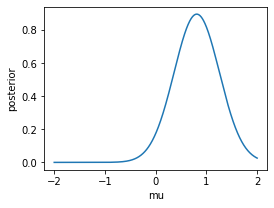

In [5]:
data = np.random.randn(5) # fake data points from normal distribution
mu = np.linspace(-2,2,1000) # grid over the parameter


lk = np.exp(-.5 * np.square(data - mu[:, None]).sum(axis=1))
pdf = lk / np.trapz(lk, mu)

plot(mu,pdf); xlabel('mu'); ylabel('posterior');
np.trapz(mu*pdf,mu) # expectation value

0.006214958179851753

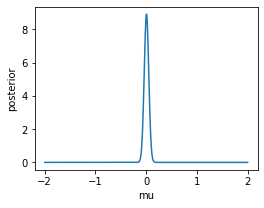

In [6]:
data = np.random.randn(500) # fake data points from normal distribution
mu = np.linspace(-2,2,1000) # grid over the parameter


lk = np.exp(-.5 * np.square(data - mu[:, None]).sum(axis=1))
pdf = lk / np.trapz(lk, mu)

plot(mu,pdf); xlabel('mu'); ylabel('posterior');
np.trapz(mu*pdf,mu) # expectation value

### Multiple Datasets

- If the data set $D$ consists of two subsets of $D_1$ and $D_2$, we can consider them together or separately

>$\displaystyle p(\theta \lvert D_1,D_2) = \frac{p(\theta)\, p(D_1, D_2 \lvert \theta)}{p(D_1, D_2)}$
><br><br>
> also 
><br><br>
>$\displaystyle p(\theta \lvert D_1, D_2) = \frac{p(\theta \lvert D_1)\, p(D_2 \lvert \theta, D_1)}{p(D_2 \lvert D_1)}$

- Because

>$\displaystyle p(\theta \lvert D) = p(\theta \lvert \color{green}{D_1}, \color{red}{D_2}) = \frac{p(\theta \lvert \color{green}{D_1})\, p(\color{red}{D_2} \lvert \theta, \color{green}{D_1})}{p(\color{red}{D_2} \lvert \color{green}{D_1})}$
>$\displaystyle = \frac{p(\theta)\,p(\color{green}{D_1} \lvert \theta)\, p(\color{red}{D_2} \lvert \theta, \color{green}{D_1})}{p(\color{green}{D_1})\,p(\color{red}{D_2} \lvert \color{green}{D_1})}$
>$\displaystyle = \frac{p(\theta)\,p(\color{green}{D_1},\color{red}{D_2} \lvert \theta)}{p(\color{green}{D_1}, \color{red}{D_2})}$
>$\displaystyle = \frac{p(\theta)\,p(D \lvert \theta)}{p(D)}$

- Incremental learning


>$\displaystyle D = \big\{ \color{green}{D_1},\ \color{red}{D_2},\ \color{darkblue}{D_3}, \dots, \color{black}{D_N} \big\}$

### Characterization of Posterior PDF

- Mode, Mean, Covariance, etc... For example,

>$ \displaystyle \bar{\theta} = \int {\color{default}\theta}\ p(\theta)\ d\theta$
>$ \displaystyle =  \frac{\int \theta\,\pi(\theta)\,{\cal{}L}(\theta)\,d\theta}{\int \pi(\theta)\,{\cal{}L}(\theta)\,d\theta }$


- In general, numerical evaluation is required 

> Randomized algorithms;
> Sampling from distributions




### Caution!

- Noisy likelihood function with false peak(s)
 
> Misleading MLE by an erroneous spike?
 
- Mean could be completely off

> E.g., center of a ring 

### Sampling 

- How to calculate an integral such as

>$ \displaystyle \langle f(\theta)\rangle  =  \int f(\theta)\,p(\theta)\,d\theta $

- Approximation using $\{\theta_i\}$ sample from $p(\cdot)$

>$ \displaystyle \langle f(\theta)\rangle \approx \frac{1}{n}\sum_{i=1}^{n} f(\theta_i) $

- But we really don't know the posterior that well!

### Sampling from Prior

- Prior is better known 

> $ \displaystyle \langle f(\theta)\rangle =$
>$ \displaystyle \frac{\int f(\theta)\,\pi(\theta)\,{\cal{}L}(\theta)\,d\theta}{\int \pi(\theta)\,{\cal{}L}(\theta)\,d\theta }$


- Approximation using $\{\theta_i\}$ sample from $\pi(\cdot)$

>$ \displaystyle \langle f(\theta)\rangle \approx \frac{\sum f(\theta_i)\,{\cal{}L}(\theta_i)}{\sum {\cal{}L}(\theta_i)} $

### Sampling from ...

- E.g., likelihood?

>$ \displaystyle \langle f(\theta)\rangle \approx \frac{\sum f(\theta_i)\,\pi(\theta_i)}{\sum \pi(\theta_i)} $

- What about something "similar"?

### Importance Sampling

- We usually have integrals such as

>$ \displaystyle \langle f(\theta)\rangle = \int f(\theta)\,g(\theta)\,d\theta$

- If we can't sample from $g(\cdot)$ but can from a $h(\cdot)$ 

> s.t. $\ \ \ g(\theta) \leq K \cdot h(\theta) \ \ \ $ for any $\theta$ and a suitably large $K$
><br><br>
>$\displaystyle \langle f(\theta)\rangle \approx \frac{1}{n} \sum_i^n f(\theta_i)\,\frac{g(\theta_i)}{h(\theta_i)}$

### Markov-chain Monte Carlo a.k.a. MCMC

- Instead of independent samples, produce a chain of samples in a special way

> **Metropolis-Hastings**
> 0. Start from a random $\theta_t = \theta_0$ parameter set
> 0. Obtain a new $\theta'$ from a proposal distribution $Q(\theta;\theta_t)$
> 0. Accept $\theta_{t+1} = \theta'$ with probability $g(\theta')/g(\theta_t)$
> 0. Let $t\leftarrow t\!+\!1$ and go to Step 2.

- Use the samples of the chain as if taken from the posterior PDF

  - Many other variants 

  - Watch out for burn in, correlations, etc...

### For example

<img src=https://upload.wikimedia.org/wikipedia/commons/a/a6/3dRosenbrock.png width=400 align=left>

### Model Comparison

- Bayesian hypothesis testing

> Posterior probability of a model given the data vs another (odds)
><br><br>
>$\displaystyle \frac{P(M_1 \lvert D)}{P(M_2 \lvert D)} = \frac{P(M_1)\ p(D \lvert M_1)\,\big/\,p(D)}{P(M_2)\ p(D \lvert M_2)\,\big/\,p(D)}$
>$\displaystyle = \frac{P(M_1)}{P(M_2)} \frac{p(D \lvert M_1)}{p(D \lvert M_2)}$
><br><br>
>$\displaystyle \ \ \ \ = \frac{P(M_1)}{P(M_2)}\  B(M_1,M_2 \lvert D)$
><br><br>
> Posterior odds $=$ Prior odds $\times$ the Bayes factor


### Marginal Likelihood

- Integral over all parameters

>$\displaystyle p(D \lvert M) = \int  p(\theta \lvert M)\ p(D \lvert \theta,M) d\theta$ 
><br><br>
> Cf. Bayes' rule
><br><br>
>$\displaystyle p(\theta \lvert D,M) = \frac{p(\theta \lvert M)\ p(D \lvert \theta,M)}{p(D \lvert M)}$ 

- No improper prior here!

### Complementer Hypotheses

- I.e., $P(M_1) + P(M_2) = 1$ also $P(M_1 \lvert D) + P(M_2 \lvert D) = 1$ 

> Let $P$ represent $P(M_1 \lvert D)$ and $P_0$ be $P(M_1)$
><br><br>
>$\displaystyle \frac{P}{1-P} = \frac{P_0}{1-P_0} B$
><br><br>
> Hence
><br><br>
>$\displaystyle P = \left[ 1 + \frac{1-P_0}{P_0 B} \right]^{-1}   $


In [ ]:
# Posterior as fn of ln(B)
logB = np.linspace(-6,6,100) 
B = np.exp(logB)
for P0 in [0.5]:
    P = 1 / (1 + (1-P0)/(P0*B)) 
    plt.plot(logB, P,'-', label=str(P0));
# sigmoid function cf. neural networks
xlabel('Log of Bayes factor'); ylabel('Posterior'); 
legend(loc=4); ylim(None,1.05);